In [1]:
## this cell is hidden in sphinx (see the cell metadata)
import expectexception

# `pycf3` tutorial

## Introduction

This tutorial is a guide of how you can use the NAM and Cosmicflows-3 Distance-Velocity Calculator client for Python.

## Fundamentals

- `pyc3f` present an [OO](https://en.wikipedia.org/wiki/Object-oriented_programming) API to access the same capabilities of http://edd.ifa.hawaii.edu/NAMcalculator/  and http://edd.ifa.hawaii.edu/CF3calculator/ .
- Please be gentle with the server.

### Looking the original project

The original calculator is a web page with 4 main parts

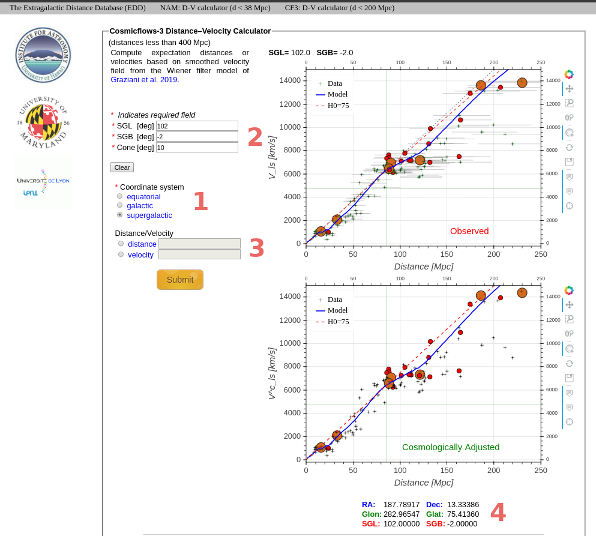

1. Select the coordinate system.
2. Provide the location of seach
3. Distance/Velocity selector (optional)
4. The entire result is on the right side

So lets analize this 3 parts in pycf3

The first thing you need to do is import the project

In [2]:
import pycf3

## Example 1:  Sending a request to the NAM D-V calcualtor 

First lets create the **NAM Client**

In [3]:
nam = pycf3.NAM()
nam

NAM(calculator='NAM', cache_dir='/home/juan/pycf3_data/_cache_', cache_expire=None)

Then the basic functionality of the NAM are provided in two diferent methods

- `calculate_distance()` to calculate a **distance** based on a given *velocity*.
- `calculate_velocity()` to calculate a **velocity** based on a given *distance*.


Now let's asume we want the same query of the next image

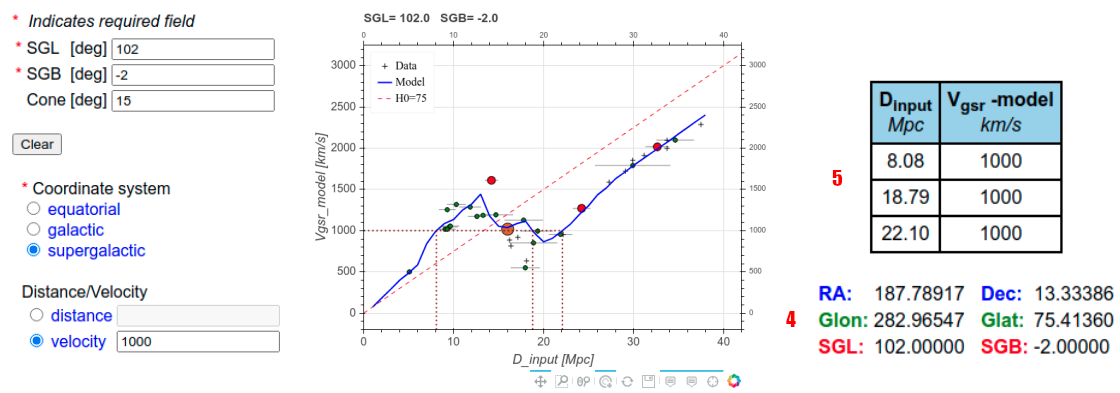

Here is how to send the same request in a Python code:

In [4]:
result = nam.calculate_distance(velocity=1000, sgl=102, sgb=-2)
result

Result - NAM(velocity=1000, sgl=102, sgb=-2)
+----------+-----------------+---------------------------------------+
| Observed | Distance (Mpc)  | [ 8.08088613 18.78629089 22.09785028] |
|          | Velocity (Km/s) | 1000.0                                |
+----------+-----------------+---------------------------------------+

> Note: You can click `Show/Hide Raw`to check the raw response from the server

So the values of value in the **Figure #4 table** are available at

In [5]:
result.calculated_at_

CalculatedAt(ra=187.7891703346409, dec=13.333860121247609, glon=282.9654677357161, glat=75.4136002414933, sgl=102.0, sgb=-2.0)

and the values of **5** are available at:

In [6]:
result.observed_velocity_

1000.0

In [7]:
result.observed_distance_

array([ 8.08088613, 18.78629089, 22.09785028])

Also the entire raw response are located in the `json_` property as a dictionary

In [8]:
result.json_

{'message': 'Success',
 'RA': 187.7891703346409,
 'Dec': 13.333860121247609,
 'Glon': 282.9654677357161,
 'Glat': 75.4136002414933,
 'SGL': 102.0,
 'SGB': -2.0,
 'velocity': 1000.0,
 'distance': [8.08088612690689, 18.786290885088945, 22.097850275812398]}

## Example 2: How to extract the radial velocity of an object with a given distance in NAM

In [9]:
nam.calculate_velocity(distance=30, sgl=102, sgb=-2)

Result - NAM(distance=30, sgl=102, sgb=-2)
+----------+-----------------+--------------------+
| Observed | Distance (Mpc)  | [30.]              |
|          | Velocity (Km/s) | 1790.9019256321444 |
+----------+-----------------+--------------------+

## Example 3: Sending a request to the Cosmicflows-3 D-V calcualtor (d < 200 Mpc)

We are trying to reproduce this query from Python

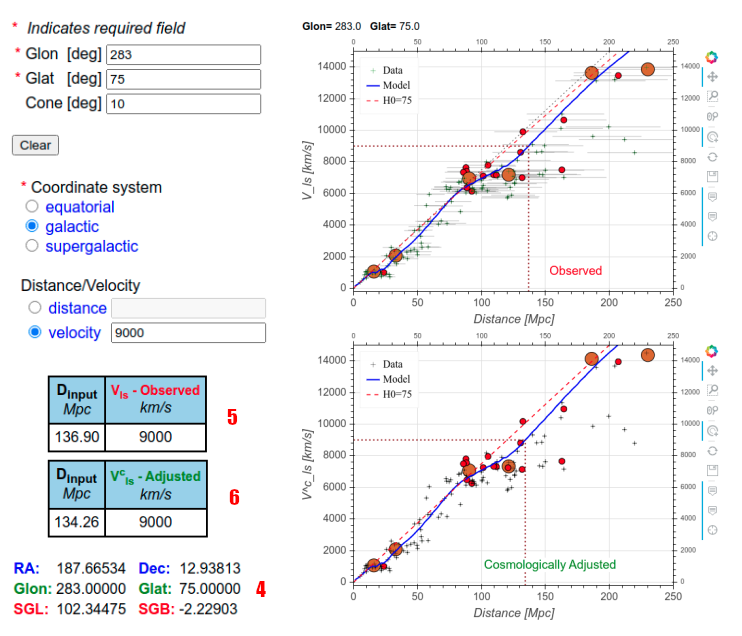

As we  state before, first we need to create a **Cosmic Flows-3 Client**

In [10]:
cf3 = pycf3.CF3()
cf3

CF3(calculator='CF3', cache_dir='/home/juan/pycf3_data/_cache_', cache_expire=None)

Let's calculate the distance

In [11]:
result = cf3.calculate_distance(velocity=9000, glon=283, glat=75)
result

Result - CF3(velocity=9000, glon=283, glat=75)
+----------+-----------------+----------------+
| Observed | Distance (Mpc)  | [136.90134347] |
|          | Velocity (Km/s) | 9000.0         |
+----------+-----------------+----------------+
| Adjusted | Distance (Mpc)  | [134.26214472] |
|          | Velocity (Km/s) | 9000.0         |
+----------+-----------------+----------------+

Like Nam, **#4** can be accessed with `result.calculated_at_` and **#5** with `result.observed_velocity_` and `result.observed_distance_` respectively.

In other hand **#6** are available in `result.adjusted_distance_` and `result.adjusted_velocity_`

In [12]:
result.adjusted_distance_

array([134.26214472])

In [13]:
result.adjusted_velocity_

9000.0

> Note: The NAM client also has the *adjusted_* values but all are `None`.

----

## PyCF3 Cache system

By default any `pycf3.CF3` instance is created with a cache that prevent to send two times the same request to the server. For example: lets make two times the same request with time measurement

In [ ]:
cf3 = pycf3.CF3()

In [ ]:
## this cell is hidden in sphinx (see the cell metadata)
cf3.cache.clear()

In [ ]:
%%time
cf3.equatorial_search()

In [ ]:
%%time
cf3.equatorial_search()

As you can se the first time the total time is **17 seconds** and de the second time is only **6.56 ms**. This is because the project store te result on the local hardrive to avoid repeat the requests (by default a folfer called `pycf3_data`, is created in the user home)

But if we change the request by asking for another declination, this gonna be slow again:

In [ ]:
%%time
cf3.equatorial_search(dec=13.5)

And now this is fast again

In [ ]:
%%time
cf3.equatorial_search(dec=13.5)

Also is useful to only allow data not "too old". In these cases, you can set how many second your local data will be available by adding the parameter `cache_expire` when you create the *CF3* client.

In [ ]:
cf3 = pycf3.CF3(cache_expire=2)

At this point the new cf3 instance shares the same default-cache of the previous one. So if we here execute any of the previous request this gonna be fast

In [ ]:
%%time
cf3.equatorial_search()

Yo can remove the entire "cached" data by calling the command

In [ ]:
cf3.cache.clear()

Now we can send the same original request and this gonna be available for 2 seconds before a new request was needed.

In [ ]:
%%time
cf3.equatorial_search()

import time
time.sleep(3)  # lets sleep 3 seconds

because we wait to loong the nest seach will be slow again

In [ ]:
%%time
cf3.equatorial_search()

But if we don't wait the request was fast

In [ ]:
%%time
cf3.equatorial_search()

### Changing the cache backend

The entire cache backend of pycf3 was created with **DiskCache** (http://www.grantjenks.com/docs/diskcache/)

You can change your cache location (to store differen datasets for example) by providing another `diskcache.Cache` or `diskcache.FanoutCache` instance.

```python

import diskcache as dcache

cache = dcache.FanoutCache(
    directory="my/cache/directory")

# let make our data valid for 24 hours
cf3 = pycf3.CF3(cache=cache, cache_expire=86400)

```

Finally to totally deactivate the cache system. pycf3 provides a cache called `NoCache`.

In [ ]:
cf3 = pycf3.CF3(cache=pycf3.NoCache())
cf3

----

## PyCF3 Retry

By default any `pycf3.CF3` instance try **3 times** to perform a request.
if you want to add more retries you need to change the default `session` of the instance.

For example if you want to try 2 times:

In [ ]:
session = pycf3.RetrySession(retries=2)
cf3 = pycf3.CF3(session=session)

Also if you want only to wait some arbitrary number of seconds between any request you can add the `timeout=<SECONDS>` to any search query.

In [ ]:
## this cell is hidden in sphinx (see the cell metadata)
cf3.cache.clear()

In [ ]:
# no more than 5 seconds between every request
cf3.equatorial_search(timeout=5)